In [ ]:
from faker import Faker
import numpy as np
import pandas as pd
from random import choice, sample
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
data = pd.read_csv(r"C:\Users\LENOVO\Desktop\activity report\dataset.csv")

In [15]:
data.head()

,patient_id,name,gender,age,race,side_effects
0,331808,David Chang,female,30-40,Hispanic,Mild Side Effects
1,134912,Taylor Williams,female,0-10,Hispanic,Mild Side Effects
2,29096,Kevin Duffy,female,20-30,Black,Moderate Side Effects
3,37395,Christina Harper,male,90-100,Hispanic,Moderate Side Effects
4,12009,Paula Simon,female,30-40,Asian,Severe Side Effects


In [16]:
data.shape

(400000, 6)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   patient_id    400000 non-null  int64 
 1   name          400000 non-null  object
 2   gender        400000 non-null  object
 3   age           400000 non-null  object
 4   race          400000 non-null  object
 5   side_effects  400000 non-null  object
dtypes: int64(1), object(5)
memory usage: 18.3+ MB


In [18]:
data['age'].value_counts()

70-80     75855
30-40     72095
50-60     64070
90-100    35925
0-10      32003
80-90     28269
20-30     28087
60-70     23767
40-50     20019
10-20     19910
Name: age, dtype: int64

In [19]:
data['gender'].value_counts()

female    280164
male      119836
Name: gender, dtype: int64

In [20]:
# The correlation between craeted features is low, so mapping is done for improving accuracy

In [21]:
data.loc[data['age'] == '0-10', 'age_score'] = '6'  
data.loc[data['age'] == '10-20', 'age_score'] = '2' 
data.loc[data['age'] == '20-30', 'age_score'] = '5'  
data.loc[data['age'] == '30-40', 'age_score'] = '9'  
data.loc[data['age'] == '40-50', 'age_score'] = '1' 
data.loc[data['age'] == '50-60', 'age_score'] = '8'  
data.loc[data['age'] == '60-70', 'age_score'] = '3'  
data.loc[data['age'] == '70-80', 'age_score'] = '10' 
data.loc[data['age'] == '80-90', 'age_score'] = '4'  
data.loc[data['age'] == '90-100', 'age_score'] = '7'

In [22]:
data.loc[data['side_effects'] == 'Moderate Side Effects', 'sideeffects_score'] = '5'  
data.loc[data['side_effects'] == 'Severe Side Effects', 'sideeffects_score'] = '4' 
data.loc[data['side_effects'] == 'Mild Side Effects', 'sideeffects_score'] = '3'  
data.loc[data['side_effects'] == 'Extremely Severe Side Effects', 'sideeffects_score'] = '2'  
data.loc[data['side_effects'] == 'No Side Effects', 'sideeffects_score'] = '1'

In [23]:
data.loc[data['race'] == 'White', 'race_score'] = '4'  
data.loc[data['race'] == 'Hispanic', 'race_score'] = '3' 
data.loc[data['race'] == 'Black', 'race_score'] = '2'  
data.loc[data['race'] == 'Asian', 'race_score'] = '1'

In [24]:
data.loc[data['gender'] == 'male', 'gender_score'] = '4'  
data.loc[data['gender'] == 'female', 'gender_score'] = '6'

In [25]:
data = data.astype({'age_score': 'int','race_score': 'int','sideeffects_score': 'int','gender_score': 'int'})

In [26]:
data['score']=data['age_score']+data['race_score']+data['sideeffects_score']+data['gender_score']

In [27]:
data['ranking']=data['score']/2

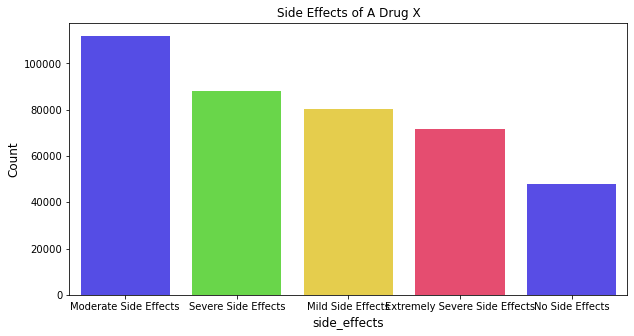

In [28]:
count = data['side_effects'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(count.index, count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('side_effects', fontsize=12)
plt.title('Side Effects of A Drug X')
plt.show()

[127747, 112429, 87869, 71955]


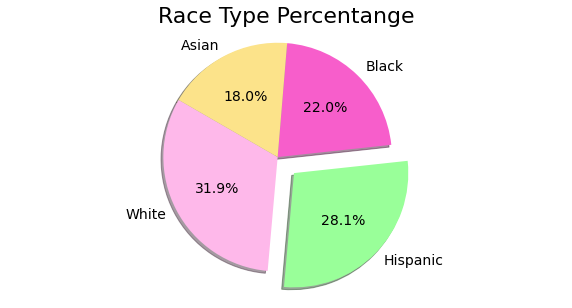

In [29]:
# Race types and its values Single Pie chart
populations = data['race'].value_counts()
pop_size = populations.values.tolist() #Provides numerical values
pop_types = populations.axes[0].tolist() #Converts index labels object to list
print(pop_size)
# Data to plot
pop_labels = 'White','Hispanic','Black','Asian'
colors = ['#FEB8EA','#99ff99','#F75ECB','#FCE38A']
explode = (0, 0.2,0,0)  # explode 1st slice
fig = plt.figure(figsize=(10,5))
# Plot
plt.title('Race Type Percentange', fontsize=22)
patches, texts, autotexts = plt.pie(pop_size, explode=explode, labels=pop_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

In [30]:
fe=data.groupby('race').size()/len(data)
data.loc[:, 'race_fe']=data['race'].map(fe)

In [31]:
fe=data.groupby('gender').size()/len(data)
data.loc[:, 'gender_fe']=data['gender'].map(fe)

In [32]:
fe=data.groupby('age').size()/len(data)
data.loc[:, 'age_fe']=data['age'].map(fe)

In [33]:
data=data.drop(['patient_id','race','gender','age'],axis=1)
data.head()

,name,side_effects,age_score,sideeffects_score,race_score,gender_score,score,ranking,race_fe,gender_fe,age_fe
0,David Chang,Mild Side Effects,9,3,3,6,21,10.5,0.281073,0.70041,0.180237
1,Taylor Williams,Mild Side Effects,6,3,3,6,18,9.0,0.281073,0.70041,0.080007
2,Kevin Duffy,Moderate Side Effects,5,5,2,6,18,9.0,0.219672,0.70041,0.070218
3,Christina Harper,Moderate Side Effects,7,5,3,4,19,9.5,0.281073,0.29959,0.089813
4,Paula Simon,Severe Side Effects,9,4,1,6,20,10.0,0.179888,0.70041,0.180237


In [34]:
data=data.drop(['name','age_score','race_score','sideeffects_score','gender_score', 'score'],axis=1)
data.head()

,side_effects,ranking,race_fe,gender_fe,age_fe
0,Mild Side Effects,10.5,0.281073,0.70041,0.180237
1,Mild Side Effects,9.0,0.281073,0.70041,0.080007
2,Moderate Side Effects,9.0,0.219672,0.70041,0.070218
3,Moderate Side Effects,9.5,0.281073,0.29959,0.089813
4,Severe Side Effects,10.0,0.179888,0.70041,0.180237


In [36]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(data["side_effects"])
data["side_effects"]=encoder.transform(data["side_effects"])
print(data["side_effects"])

0         1
1         1
2         2
3         2
4         4
         ..
399995    4
399996    1
399997    2
399998    0
399999    2
Name: side_effects, Length: 400000, dtype: int32


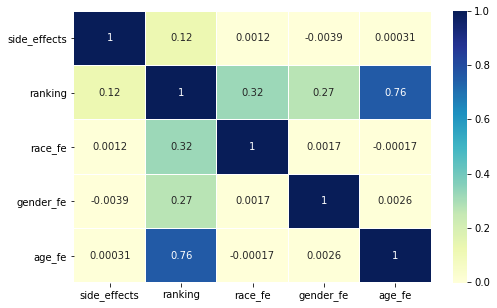

In [37]:
corrmatrix=data.corr()
plt.subplots(figsize=(8,5))
sns.heatmap(data.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [38]:
x=data.drop('side_effects',axis=1)
y=data['side_effects'] 
x.head()

,ranking,race_fe,gender_fe,age_fe
0,10.5,0.281073,0.70041,0.180237
1,9.0,0.281073,0.70041,0.080007
2,9.0,0.219672,0.70041,0.070218
3,9.5,0.281073,0.29959,0.089813
4,10.0,0.179888,0.70041,0.180237


In [39]:
x.dtypes

ranking      float64
race_fe      float64
gender_fe    float64
age_fe       float64
dtype: object

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

In [41]:
x.shape

(400000, 4)

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score

In [43]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)
y_predlr = logit_model.predict(x_test)

In [44]:
print(accuracy_score(y_test,y_predlr))

0.58095


In [45]:
print('Weighted f1 score:{:.2f}'.format(f1_score(y_test,y_predlr,average='weighted')))

Weighted f1 score:0.57


In [46]:
confusion_matrix(y_test,y_predlr)

array([[14683,  3508,     0,  2774,  4138],
       [ 4273, 14844,  3050,  1149,  4847],
       [    0,  1937, 32959,     0,  4267],
       [10850,  2338,     0,  3548,     0],
       [ 1275,  2241, 11738,   282, 15299]], dtype=int64)

In [47]:
from sklearn import tree
clf=tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_preddt=clf.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_preddt))

1.0


In [48]:
y_pred=clf.predict(x_test)
print(y_test, y_preddt)

23218     0
20731     1
39555     4
147506    3
314215    1
         ..
362985    4
124599    1
291845    3
365050    2
138199    0
Name: side_effects, Length: 140000, dtype: int32 [0 1 4 ... 3 2 0]


In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train.values.ravel())
y_predrf=rf.predict(x_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_predrf))

Accuracy: 1.0


In [52]:
accuracy_score(y_test,y_predrf)

1.0

In [54]:
#Feature Importance in Random Forest

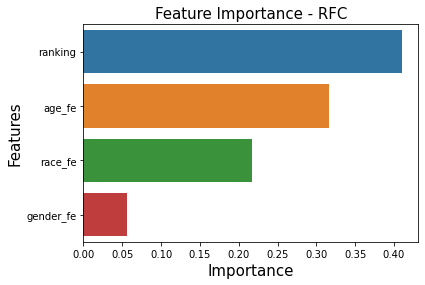

In [55]:
important_features = pd.DataFrame({'Features': x_train.columns, 
                                   'Importance': rf.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features[0:20])

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance - RFC', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

In [56]:
# Hyperparameter tuning of random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfh = RandomForestClassifier(max_depth=7, max_features=4, min_samples_leaf=2,
                      min_samples_split=5, n_estimators=1500, n_jobs=1,
                      random_state=42)
rfh.fit(x_train, y_train)


In [ ]:
y_predrfh=rfh.predict(x_test)

In [59]:
accuracy_score(y_test,y_predrfh)

0.6173428571428572

In [67]:
confusion_matrix(y_test,y_predrfh)

array([[15321,  6197,  1398,  2187,     0],
       [ 4397, 15098,  3972,   579,  4117],
       [  422,  1431, 35180,     0,  2130],
       [ 6681,  1204,   179,  8672,     0],
       [ 1593,  5501, 11491,    93, 12157]], dtype=int64)

In [68]:
print('Weighted f1 score:{:.2f}'.format(f1_score(y_test,y_predrfh,average='weighted')))

Weighted f1 score:0.61
